In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train_values.csv')
df_test = pd.read_csv('test_values.csv')
df_labels = pd.read_csv('train_labels.csv')


In [3]:
df_train.shape

(260601, 39)

In [4]:
df_test.shape

(86868, 39)

In [5]:
def convert(df):
    string_columns = [i for i, dtype in enumerate(df.dtypes) if dtype == 'object']

    # Chuyển đổi các giá trị string thành số nguyên
    label_encoders = []
    for col in string_columns:
        label_encoder = LabelEncoder()
        df.iloc[:, col] = label_encoder.fit_transform(df.iloc[:, col])
        label_encoders.append(label_encoder)

convert(df_train)
convert(df_test)


In [6]:
def pca(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    pca = PCA(n_components=3)
    return pca.fit_transform(df_scaled)

df_train_pca = pca(df_train)
df_test_pca = pca(df_test)

In [7]:
def plot_pca(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df[:, 0], df[:, 1], df[:, 2], c='b', marker='o')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('PCA Plot')

    plt.show()

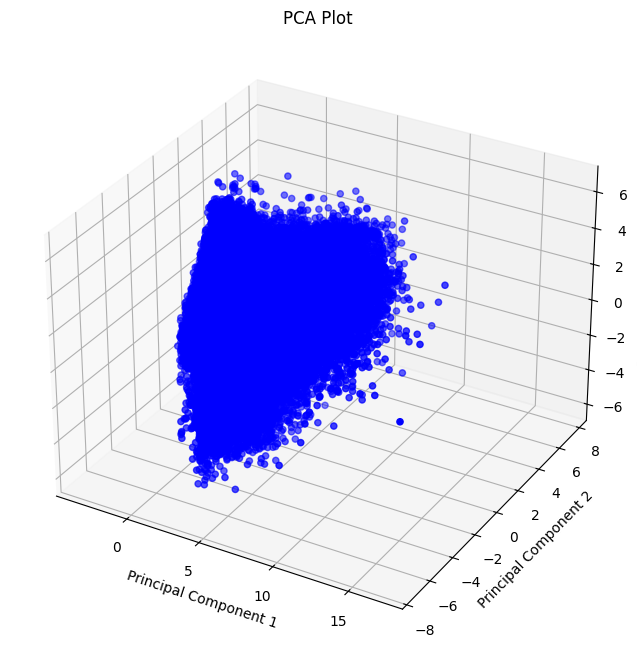

In [8]:
plot_pca(df_train_pca)

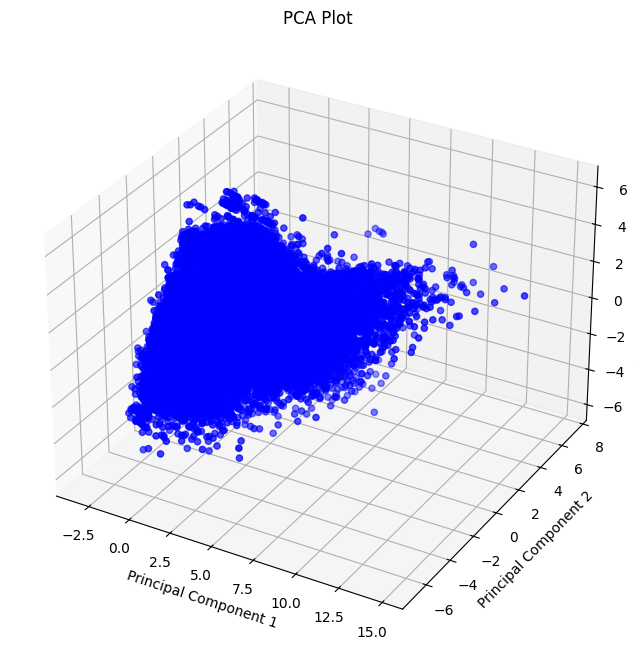

In [9]:
plot_pca(df_test_pca)

In [10]:
df_train_pca

array([[-1.02674091, -0.94382798, -0.16898938],
       [ 0.02965549, -0.35770637,  0.43804735],
       [-1.02246775, -0.43572748,  0.19561646],
       ...,
       [ 0.17561365, -0.98816112, -0.06609829],
       [ 3.9525412 ,  1.95183606, -1.38066162],
       [-0.04532657, -1.45748316, -0.88433965]])